In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import io
from google.colab import files

In [2]:
# upload the data
uploaded = files.upload()

Saving New_Marine_data.csv to New_Marine_data.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded.get('New_Marine_data.csv')),encoding = 'unicode_escape')
df.head()

,vsl_name,IMO NO,report date,GMT time,dft_fwd,dft_aft,displ,w_force,w_dir,rel_deg1,sea_st,stm_hrs,dst_last,swell,rel_deg2,rpm,slip,me_ho,curfavagt,curknots,Date
0,MRT MASTAN,6461375,07-12-2015 12:00,12-07-2015 03:00,8.32,9.75,907807,5,E,298,MODERATE,23,314,2,298,82.8,7.37,56.9,A,0.5,07-12-2015
1,MRT DAMPIER,6461325,20-11-2016 12:00,11-20-16 4:00,18.39,18.39,324007,5,NE,20,MODERATE,24,230,2,63,64.3,17.00,30.2,-,0.8,20-11-2016
2,MRT DAMPIER,6461325,21-11-2016 12:00,11-21-16 4:00,18.27,18.39,324007,3,NE,10,MODERATE,24,238,1,80,64.3,14.10,29.2,-,0.7,21-11-2016
3,MRT MASTAN,6461375,23-04-2016 12:00,4-23-16 4:00,18.35,18.45,234682,4,SE,141,SLIGHT,12,119,1,141,62.7,11.19,12.6,+,0.0,23-04-2016
4,MRT MASTAN,6461375,24-04-2016 12:00,4-24-16 4:00,18.35,18.45,234682,4,E,99,SLIGHT,24,244,1,279,62.6,8.61,26.1,+,0.5,24-04-2016


In [4]:
df.describe()

,IMO NO,dft_fwd,dft_aft,displ,w_force,rel_deg1,stm_hrs,dst_last,swell,rel_deg2,rpm,slip,me_ho,curknots
count,2.921000e+03,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2886.000000
mean,7.825254e+06,11.826689,12.573126,126020.930161,4.041767,170.719617,22.943855,260.002054,1.466963,164.319411,73.139312,7.745224,27.169558,0.505544
std,1.547929e+06,4.485666,3.803528,69470.304697,1.289699,125.040845,3.874079,81.755101,0.850677,121.396685,11.725244,9.486487,8.285352,0.519956
min,6.461301e+06,4.600000,6.800000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.700000,0.000000,-2.000000
25%,6.461337e+06,7.400000,9.000000,71721.000000,3.000000,45.000000,24.000000,233.000000,1.000000,45.000000,63.900000,0.950000,24.400000,0.200000
50%,6.461375e+06,12.020000,12.100000,98854.000000,4.000000,180.000000,24.000000,265.000000,1.000000,165.000000,69.300000,8.140000,27.200000,0.400000
75%,9.607148e+06,17.140000,17.400000,220169.000000,5.000000,300.000000,24.000000,297.000000,2.000000,280.000000,82.400000,13.700000,30.200000,0.700000
max,9.629732e+06,18.480000,18.520000,907807.000000,8.000000,450.000000,29.000000,3328.000000,6.000000,450.000000,98.650000,67.520000,62.300000,4.700000


In [5]:
df.describe(exclude=[np.number])

,vsl_name,report date,GMT time,w_dir,sea_st,curfavagt,Date
count,2921,2921,2921,2921,2921,2921,2921
unique,14,400,1126,33,20,11,377
top,MRT DIAS,11-11-2016 12:00,11-15-16 4:00,SE,SLIGHT,-,11-11-2016
freq,296,13,10,491,1109,1154,14


In [6]:
df.dtypes

vsl_name        object
IMO NO           int64
report date     object
GMT time        object
dft_fwd        float64
dft_aft        float64
displ            int64
w_force          int64
w_dir           object
rel_deg1         int64
sea_st          object
stm_hrs          int64
dst_last         int64
swell            int64
rel_deg2         int64
rpm            float64
slip           float64
me_ho          float64
curfavagt       object
curknots       float64
Date            object
dtype: object

In [7]:
df.isnull().sum()

vsl_name        0
IMO NO          0
report date     0
GMT time        0
dft_fwd         0
dft_aft         0
displ           0
w_force         0
w_dir           0
rel_deg1        0
sea_st          0
stm_hrs         0
dst_last        0
swell           0
rel_deg2        0
rpm             0
slip            0
me_ho           0
curfavagt       0
curknots       35
Date            0
dtype: int64

In [8]:
df.mode()['w_dir'][0]

'SE                  '

In [9]:
df['w_dir'] = df['w_dir'].fillna('SE')
df['sea_st'] = df['sea_st'].fillna(df.mode()['sea_st'][0])
df['curknots'] = df['curknots'].fillna(df.mode()['curknots'][0])
df.isnull().sum()

vsl_name       0
IMO NO         0
report date    0
GMT time       0
dft_fwd        0
dft_aft        0
displ          0
w_force        0
w_dir          0
rel_deg1       0
sea_st         0
stm_hrs        0
dst_last       0
swell          0
rel_deg2       0
rpm            0
slip           0
me_ho          0
curfavagt      0
curknots       0
Date           0
dtype: int64

In [10]:
final_df = df.drop(['report date', 'GMT time','IMO NO'],1).set_index('Date')
final_df.head()

,vsl_name,dft_fwd,dft_aft,displ,w_force,w_dir,rel_deg1,sea_st,stm_hrs,dst_last,swell,rel_deg2,rpm,slip,me_ho,curfavagt,curknots
Date,,,,,,,,,,,,,,,,,
07-12-2015,MRT MASTAN,8.32,9.75,907807,5,E,298,MODERATE,23,314,2,298,82.8,7.37,56.9,A,0.5
20-11-2016,MRT DAMPIER,18.39,18.39,324007,5,NE,20,MODERATE,24,230,2,63,64.3,17.00,30.2,-,0.8
21-11-2016,MRT DAMPIER,18.27,18.39,324007,3,NE,10,MODERATE,24,238,1,80,64.3,14.10,29.2,-,0.7
23-04-2016,MRT MASTAN,18.35,18.45,234682,4,SE,141,SLIGHT,12,119,1,141,62.7,11.19,12.6,+,0.0
24-04-2016,MRT MASTAN,18.35,18.45,234682,4,E,99,SLIGHT,24,244,1,279,62.6,8.61,26.1,+,0.5


In [11]:
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return categorical_col

categorical_features(final_df)

['vsl_name', 'w_dir', 'sea_st', 'curfavagt']

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,r2_score
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
from sklearn.metrics import mean_squared_log_error

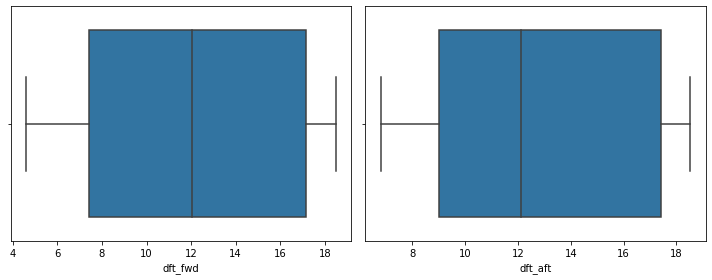

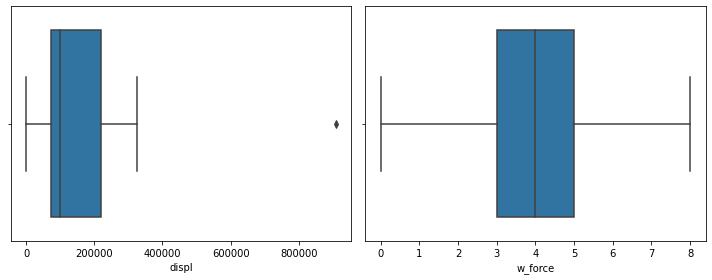

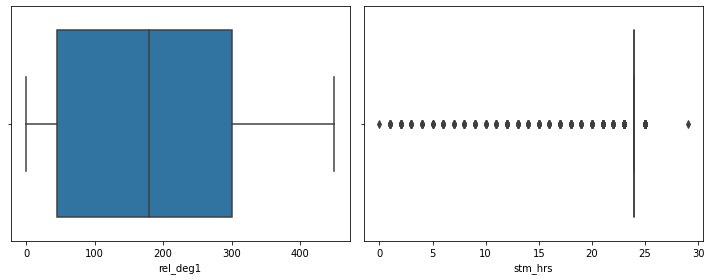

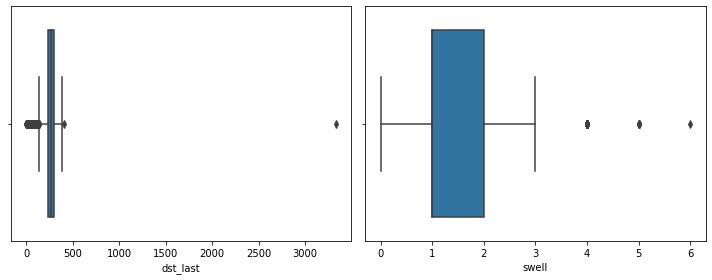

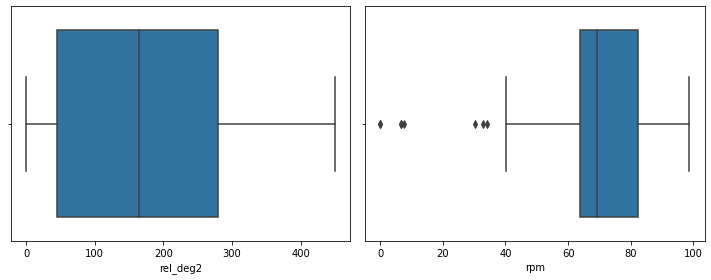

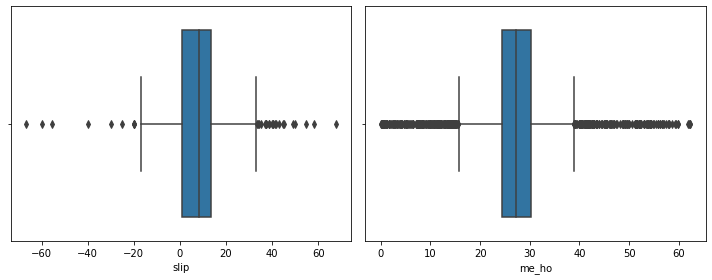

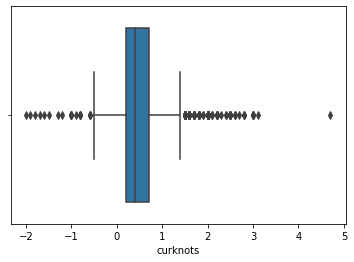

In [13]:
# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_box_plots(final_df)

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
cat_col = ['vsl_name', 'w_dir', 'sea_st', 'curfavagt']
for i in cat_col:
  final_df[i] = labelencoder.fit_transform(final_df[i])
final_df.head()


,vsl_name,dft_fwd,dft_aft,displ,w_force,w_dir,rel_deg1,sea_st,stm_hrs,dst_last,swell,rel_deg2,rpm,slip,me_ho,curfavagt,curknots
Date,,,,,,,,,,,,,,,,,
07-12-2015,1,8.32,9.75,907807,5,0,298,4,23,314,2,298,82.8,7.37,56.9,4,0.5
20-11-2016,6,18.39,18.39,324007,5,9,20,5,24,230,2,63,64.3,17.00,30.2,2,0.8
21-11-2016,6,18.27,18.39,324007,3,9,10,5,24,238,1,80,64.3,14.10,29.2,2,0.7
23-04-2016,1,18.35,18.45,234682,4,20,141,12,12,119,1,141,62.7,11.19,12.6,1,0.0
24-04-2016,1,18.35,18.45,234682,4,1,99,12,24,244,1,279,62.6,8.61,26.1,1,0.5


In [ ]:
test_df = final_df[-100:]
train_df = final_df[:-100]

In [ ]:
# further splitting the train data into dependent & independent features
feature_train_df = train_df.drop('me_ho',1)
target_train_df = train_df['me_ho']


In [ ]:
train_df.shape

(2821, 17)

In [ ]:
test_df.shape

(100, 17)

In [ ]:
MinMax = MinMaxScaler()
feature_train_df[['vsl_name', 'dft_fwd', 'dft_aft', 'displ', 'w_force', 'w_dir',
       'rel_deg1', 'sea_st', 'stm_hrs', 'dst_last', 'swell', 'rel_deg2', 'rpm',
       'slip', 'curfavagt', 'curknots']] = MinMax.fit_transform(feature_train_df[['vsl_name','dft_fwd', 'dft_aft', 'displ', 'w_force', 'w_dir',
       'rel_deg1', 'sea_st', 'stm_hrs', 'dst_last', 'swell', 'rel_deg2', 'rpm',
       'slip', 'curfavagt', 'curknots']])


In [ ]:
feature_train_df.head()

,vsl_name,dft_fwd,dft_aft,displ,w_force,w_dir,rel_deg1,sea_st,stm_hrs,dst_last,swell,rel_deg2,rpm,slip,curfavagt,curknots
Date,,,,,,,,,,,,,,,,
07-12-2015,0.076923,0.240658,0.251706,1.000000,0.625,0.00000,0.662222,0.210526,0.793103,0.777228,0.333333,0.662222,0.839331,0.551855,0.4,0.373134
20-11-2016,0.461538,0.993274,0.988908,0.330712,0.625,0.28125,0.044444,0.263158,0.827586,0.569307,0.333333,0.140000,0.651799,0.623603,0.2,0.417910
21-11-2016,0.461538,0.984305,0.988908,0.330712,0.375,0.28125,0.022222,0.263158,0.827586,0.589109,0.166667,0.177778,0.651799,0.601997,0.2,0.402985
23-04-2016,0.076923,0.990284,0.994027,0.228307,0.500,0.62500,0.313333,0.631579,0.413793,0.294554,0.166667,0.313333,0.635580,0.580316,0.1,0.298507
24-04-2016,0.076923,0.990284,0.994027,0.228307,0.500,0.03125,0.220000,0.631579,0.827586,0.603960,0.166667,0.620000,0.634567,0.561094,0.1,0.373134


In [ ]:
test_df.head()

,vsl_name,dft_fwd,dft_aft,displ,w_force,w_dir,rel_deg1,sea_st,stm_hrs,dst_last,swell,rel_deg2,rpm,slip,me_ho,curfavagt,curknots
Date,,,,,,,,,,,,,,,,,
06-09-2016,9,5.3,7.3,35447,5,28,135,5,23,244,1,105,66.10,-0.30,11.1,2,0.5
07-09-2016,9,5.3,7.3,35447,3,15,150,12,23,213,1,145,57.60,-0.50,7.4,2,0.5
08-09-2016,9,5.3,7.3,35447,4,15,150,12,24,239,1,145,63.46,1.85,9.9,2,0.5
09-09-2016,9,5.3,7.3,35447,4,15,125,12,24,254,1,130,62.70,-5.50,9.7,2,0.5
10-09-2016,9,5.3,7.3,35447,3,9,305,12,24,265,1,300,61.70,-11.90,9.2,1,1.0


In [ ]:
final_test_df = test_df.drop('me_ho',1)
final_test_df.head()

,vsl_name,dft_fwd,dft_aft,displ,w_force,w_dir,rel_deg1,sea_st,stm_hrs,dst_last,swell,rel_deg2,rpm,slip,curfavagt,curknots
Date,,,,,,,,,,,,,,,,
06-09-2016,9,5.3,7.3,35447,5,28,135,5,23,244,1,105,66.10,-0.30,2,0.5
07-09-2016,9,5.3,7.3,35447,3,15,150,12,23,213,1,145,57.60,-0.50,2,0.5
08-09-2016,9,5.3,7.3,35447,4,15,150,12,24,239,1,145,63.46,1.85,2,0.5
09-09-2016,9,5.3,7.3,35447,4,15,125,12,24,254,1,130,62.70,-5.50,2,0.5
10-09-2016,9,5.3,7.3,35447,3,9,305,12,24,265,1,300,61.70,-11.90,1,1.0


In [ ]:
final_test_df[['vsl_name','dft_fwd','dft_aft','displ','w_force','w_dir',
       'rel_deg1', 'sea_st', 'stm_hrs', 'dst_last', 'swell', 'rel_deg2', 'rpm',
       'slip', 'curfavagt', 'curknots']] = MinMax.transform(final_test_df[['vsl_name', 'dft_fwd', 'dft_aft', 'displ', 'w_force', 'w_dir',
       'rel_deg1', 'sea_st', 'stm_hrs', 'dst_last', 'swell', 'rel_deg2', 'rpm',
       'slip', 'curfavagt', 'curknots']])

In [ ]:
final_test_df.head()

,vsl_name,dft_fwd,dft_aft,displ,w_force,w_dir,rel_deg1,sea_st,stm_hrs,dst_last,swell,rel_deg2,rpm,slip,curfavagt,curknots
Date,,,,,,,,,,,,,,,,
06-09-2016,0.692308,0.014948,0.042662,-0.000103,0.625,0.87500,0.300000,0.263158,0.793103,0.603960,0.166667,0.233333,0.670046,0.494710,0.2,0.373134
07-09-2016,0.692308,0.014948,0.042662,-0.000103,0.375,0.46875,0.333333,0.631579,0.793103,0.527228,0.166667,0.322222,0.583882,0.493220,0.2,0.373134
08-09-2016,0.692308,0.014948,0.042662,-0.000103,0.500,0.46875,0.333333,0.631579,0.827586,0.591584,0.166667,0.322222,0.643284,0.510729,0.2,0.373134
09-09-2016,0.692308,0.014948,0.042662,-0.000103,0.500,0.46875,0.277778,0.631579,0.827586,0.628713,0.166667,0.288889,0.635580,0.455968,0.2,0.373134
10-09-2016,0.692308,0.014948,0.042662,-0.000103,0.375,0.28125,0.677778,0.631579,0.827586,0.655941,0.166667,0.666667,0.625443,0.408285,0.1,0.447761


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression
# split the data into dpendent & independent faetures
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(feature_train_df,target_train_df)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(feature_train_df.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
sorted_featureScores = featureScores.sort_values(["Score"], ascending=False)
sorted_featureScores  #print  best features

,Feature,Score
9,dst_last,1803.266207
8,stm_hrs,1184.370000
12,rpm,149.229546
3,displ,80.482448
0,vsl_name,33.279054
13,slip,20.104493
10,swell,16.811485
2,dft_aft,14.991763
4,w_force,8.728810
7,sea_st,8.489263


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

param_grid = {'max_depth': [1,2,3],'max_features': ['auto','sqrt','log2'],'min_samples_leaf': [1,2,3,4],'n_estimators': [50,100]}
rndmFrst = RandomForestRegressor()
grid_search = GridSearchCV(rndmFrst,param_grid =param_grid,cv=6,scoring='neg_mean_squared_error')
grid_search.fit(feature_train_df,target_train_df)
print("Optimal parameter values : ",grid_search.best_params_)
print("*************************************************************************")
print('Evaluating the model on unseen test data')


pred = grid_search.predict(final_test_df)
rmse= np.sqrt(mean_squared_error(pred,test_df['me_ho']))
print("Random Forest after GridSearch RMSE : ",rmse)


Optimal parameter values :  {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 100}
*************************************************************************
Evaluating the model on unseen test data
Random Forest after GridSearch RMSE :  6.9870365683674915


In [ ]:
pred_df = pd.DataFrame(pred.round(1),columns=['RandomForest'],index=test_df.index)
pred_df.head()

,RandomForest
Date,
06-09-2016,23.7
07-09-2016,23.7
08-09-2016,23.7
09-09-2016,23.7
10-09-2016,23.7


In [ ]:
RF_pred_act_df = pd.concat([pred_df,test_df['me_ho']],1)
RF_pred_act_df.head()

,RandomForest,me_ho
Date,,
06-09-2016,23.7,11.1
07-09-2016,23.7,7.4
08-09-2016,23.7,9.9
09-09-2016,23.7,9.7
10-09-2016,23.7,9.2


In [ ]:
from sklearn.model_selection import KFold
Lin_Reg = LinearRegression()

RMSE_scores = []
kf = KFold(n_splits=2)
kf.get_n_splits(feature_train_df)
for train_index, test_index in kf.split(feature_train_df):
  X_train, X_test = feature_train_df[train_index], feature_train_df[test_index]
  y_train, y_test = target_train_df[train_index], target_train_df[test_index]
  Lin_Reg.fit(X_train, y_train)
  y_pred = Lin_Reg.predict(X_test)
  rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
  RMSE_scores.append(rmse_score)
  
print('List of RMSE score at each iteration: ',RMSE_scores)
print('**************************************************************************************')
print("Mean RMSE score of all iteration of CV: ", np.array(RMSE_scores).mean())

KeyError: ignored

In [ ]:
from xgboost import XGBRegressor 

xgb1 = XGBRegressor()
parameters = {'learning_rate': [.03, 0.05, .07], # values should be in range from o to 1 or single values  its upto User
              'max_depth': [5, 6, 7],# values should be in range(min should be 2 max could be anything) or single values  its upto User
              'min_child_weight': [4],# values should be in range(min should be 0 max could be anything) or single values  its upto User
              'gamma': [0.7],#values should be in range(min should be 0 max could be anything) or single values  its upto User
              'colsample_bytree': [0.7],#values should be in range(min should be 0 max could be anything) or single values  its upto User
              'n_estimators': [500]}# this already we are taking care in App as RF model
grid_search = GridSearchCV(xgb1,param_grid = parameters,cv=3)
grid_search.fit(feature_train_df,target_train_df)
print('optimal parameters are :',grid_search.best_params_)
print('Evaluating the model on unseen test data')


pred = grid_search.predict(final_test_df)
rmse= np.sqrt(mean_squared_error(pred,test_df['me_ho']))
print("Random Forest after GridSearch RMSE : ",rmse)

[10:36:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
pred_df = pd.DataFrame(pred.round(1),columns=['XGBooast'],index=test_df.index)
xg_pred_act_df = pd.concat([pred_df,test_df['me_ho']],1)
xg_pred_act_df.head()
xg_pred_act_df.head()

,XGBooast,me_ho
Date,,
06-09-2016,15.800000,11.1
07-09-2016,15.600000,7.4
08-09-2016,16.400000,9.9
09-09-2016,17.799999,9.7
10-09-2016,16.700001,9.2


In [ ]:
df['report date'] = pd.to_datetime(df['report date'])
df.dtypes

vsl_name               object
IMO NO                  int64
report date    datetime64[ns]
GMT time               object
dft_fwd               float64
dft_aft               float64
displ                   int64
w_force                object
w_dir                  object
rel_deg1               object
sea_st                 object
stm_hrs               float64
dst_last              float64
swell                  object
rel_deg2               object
rpm                   float64
slip                  float64
me_ho                 float64
curfavagt              object
curknots              float64
dtype: object

In [ ]:
df.head()

,vsl_name,IMO NO,report date,GMT time,dft_fwd,dft_aft,displ,w_force,w_dir,rel_deg1,sea_st,stm_hrs,dst_last,swell,rel_deg2,rpm,slip,me_ho,curfavagt,curknots
0,MRT MASTAN,6461375,2015-12-07 12:00:00,12-7-15 3:00,8.32,9.75,907807,5,E,298,MODERATE,23.0,314.0,2,298,82.8,7.37,56.9,A,0.5
1,MRT DAMPIER,6461325,2016-11-20 12:00:00,11-20-16 4:00,18.39,18.39,324007,5,NE,20,MODERATE,24.0,230.0,2,63,64.3,17.00,30.2,-,0.8
2,MRT DAMPIER,6461325,2016-11-21 12:00:00,11-21-16 4:00,18.27,18.39,324007,3,NE,10,MODERATE,24.0,238.0,1,80,64.3,14.10,29.2,-,0.7
3,MRT MASTAN,6461375,2016-04-23 12:00:00,4-23-16 4:00,18.35,18.45,234682,4,SE,141,SLIGHT,12.0,119.0,,141,62.7,11.19,12.6,+,0.0
4,MRT MASTAN,6461375,2016-04-24 12:00:00,4-24-16 4:00,18.35,18.45,234682,4,E,99,SLIGHT,24.0,244.0,1,279,62.6,8.61,26.1,+,0.5


In [ ]:
df['Date'] = df['report date'].dt.date
df.head()

,vsl_name,IMO NO,report date,GMT time,dft_fwd,dft_aft,displ,w_force,w_dir,rel_deg1,sea_st,stm_hrs,dst_last,swell,rel_deg2,rpm,slip,me_ho,curfavagt,curknots,Date
0,MRT MASTAN,6461375,2015-12-07 12:00:00,12-7-15 3:00,8.32,9.75,907807,5,E,298,MODERATE,23.0,314.0,2,298,82.8,7.37,56.9,A,0.5,2015-12-07
1,MRT DAMPIER,6461325,2016-11-20 12:00:00,11-20-16 4:00,18.39,18.39,324007,5,NE,20,MODERATE,24.0,230.0,2,63,64.3,17.00,30.2,-,0.8,2016-11-20
2,MRT DAMPIER,6461325,2016-11-21 12:00:00,11-21-16 4:00,18.27,18.39,324007,3,NE,10,MODERATE,24.0,238.0,1,80,64.3,14.10,29.2,-,0.7,2016-11-21
3,MRT MASTAN,6461375,2016-04-23 12:00:00,4-23-16 4:00,18.35,18.45,234682,4,SE,141,SLIGHT,12.0,119.0,,141,62.7,11.19,12.6,+,0.0,2016-04-23
4,MRT MASTAN,6461375,2016-04-24 12:00:00,4-24-16 4:00,18.35,18.45,234682,4,E,99,SLIGHT,24.0,244.0,1,279,62.6,8.61,26.1,+,0.5,2016-04-24


In [ ]:
from google.colab import files

# e.g. save pandas output as csv
df.to_csv('New_Marine_data.csv')

files.download('New_Marine_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head(), categorical_col

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)

NameError: ignored